## MODULE 4 (Network)

# Prabhakar Kr. Mahto (MS21098)

This is a modelling complex model showing network formation and its dynamics of SIR model.

# Small world network of SIR model

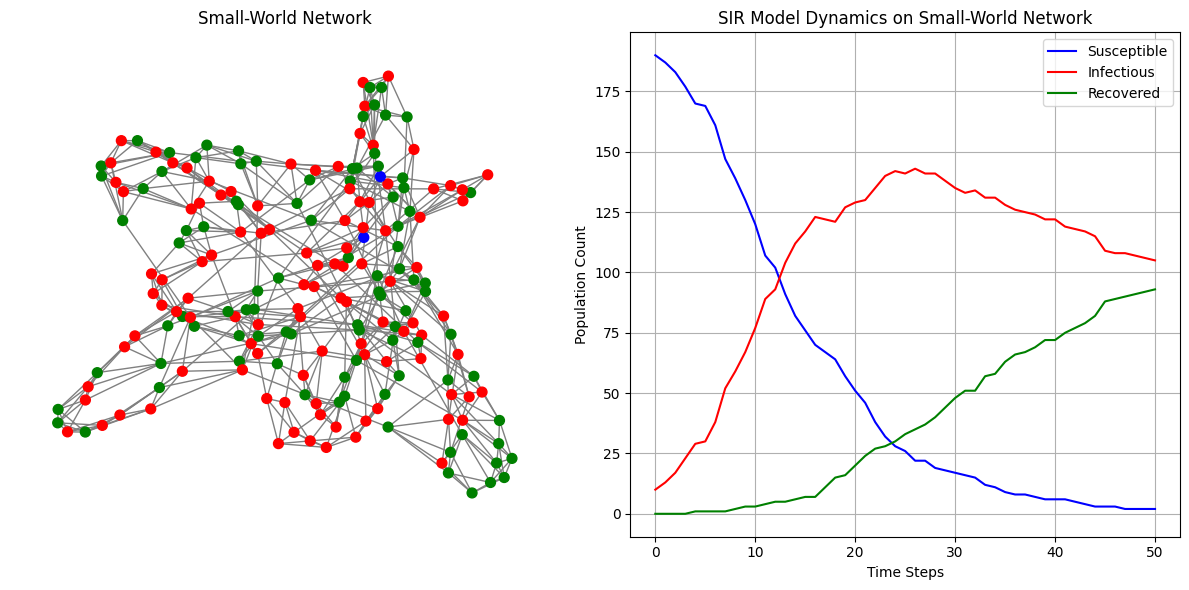

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
N = 200  # Number of nodes (small number for better network visualization)
k = 6  # Each node is connected to k nearest neighbors in a ring topology
p = 0.1  # Probability of rewiring an edge
initial_infected_fraction = 0.05  # Initial fraction of infected nodes
infection_rate = 0.1  # Probability of infection per edge
recovery_rate = 0.02  # Probability of recovery per infected node
time_steps = 50  # Number of time steps

# States
SUSCEPTIBLE = 0
INFECTIOUS = 1
RECOVERED = 2
STATE_COLORS = {
    SUSCEPTIBLE: "blue",
    INFECTIOUS: "red",
    RECOVERED: "green",
}

# Initialize the small-world network
G = nx.watts_strogatz_graph(N, k, p)
states = np.full(N, SUSCEPTIBLE)

# Randomly infect a fraction of the population
initial_infected = np.random.choice(
    G.nodes, size=int(initial_infected_fraction * N), replace=False
)
for node in initial_infected:
    states[node] = INFECTIOUS

# Data storage for dynamics
susceptible_counts = [np.sum(states == SUSCEPTIBLE)]
infectious_counts = [np.sum(states == INFECTIOUS)]
recovered_counts = [np.sum(states == RECOVERED)]

# SIR simulation
for _ in range(time_steps):
    new_states = states.copy()

    for node in G.nodes:
        if states[node] == SUSCEPTIBLE:
            # Check neighbors for infection
            neighbors = list(G.neighbors(node))
            if any(states[neighbor] == INFECTIOUS for neighbor in neighbors):
                if np.random.rand() < infection_rate:
                    new_states[node] = INFECTIOUS

        elif states[node] == INFECTIOUS:
            # Recover with some probability
            if np.random.rand() < recovery_rate:
                new_states[node] = RECOVERED

    states[:] = new_states

    # Record counts
    susceptible_counts.append(np.sum(states == SUSCEPTIBLE))
    infectious_counts.append(np.sum(states == INFECTIOUS))
    recovered_counts.append(np.sum(states == RECOVERED))

# Plotting the small-world network
plt.figure(figsize=(12, 6))

# Subplot 1: Small-World Network
plt.subplot(1, 2, 1)
node_colors = [STATE_COLORS[state] for state in states]
pos = nx.spring_layout(G, seed=42)  # Layout for visualization
nx.draw(
    G,
    pos,
    node_color=node_colors,
    with_labels=False,
    node_size=50,
    edge_color="gray",
)
plt.title("Small-World Network")

# Subplot 2: SIR Model Dynamics
plt.subplot(1, 2, 2)
plt.plot(susceptible_counts, label="Susceptible", color="blue")
plt.plot(infectious_counts, label="Infectious", color="red")
plt.plot(recovered_counts, label="Recovered", color="green")
plt.title("SIR Model Dynamics on Small-World Network")
plt.xlabel("Time Steps")
plt.ylabel("Population Count")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Scale free network for SIR model

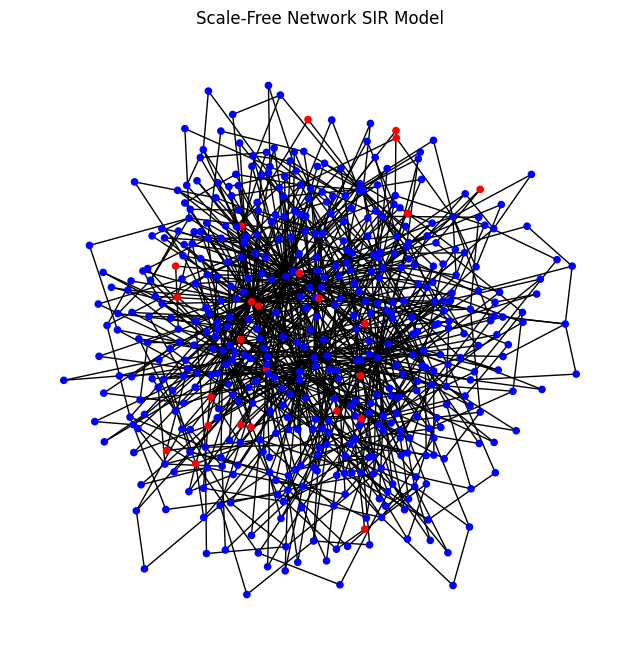

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.animation import FuncAnimation

# Parameters
N = 500  # Number of nodes
m = 2  # Number of edges to attach from a new node to existing nodes
initial_infected_fraction = 0.05  # Initial fraction of infected nodes
infection_rate = 0.1  # Probability of infection per edge
recovery_rate = 0.02  # Probability of recovery per infected node
time_steps = 100  # Number of time steps

# States
SUSCEPTIBLE = 0
INFECTIOUS = 1
RECOVERED = 2

# Initialize the scale-free network
G = nx.barabasi_albert_graph(N, m)
states = np.full(N, SUSCEPTIBLE)

# Randomly infect a fraction of the population
initial_infected = np.random.choice(
    G.nodes, size=int(initial_infected_fraction * N), replace=False
)
for node in initial_infected:
    states[node] = INFECTIOUS

# Data storage for dynamics
susceptible_counts = [np.sum(states == SUSCEPTIBLE)]
infectious_counts = [np.sum(states == INFECTIOUS)]
recovered_counts = [np.sum(states == RECOVERED)]

# SIR simulation
def update_states():
    global states
    new_states = states.copy()

    for node in G.nodes:
        if states[node] == SUSCEPTIBLE:
            # Check neighbors for infection
            neighbors = list(G.neighbors(node))
            if any(states[neighbor] == INFECTIOUS for neighbor in neighbors):
                if np.random.rand() < infection_rate:
                    new_states[node] = INFECTIOUS

        elif states[node] == INFECTIOUS:
            # Recover with some probability
            if np.random.rand() < recovery_rate:
                new_states[node] = RECOVERED

    states[:] = new_states

    # Record counts
    susceptible_counts.append(np.sum(states == SUSCEPTIBLE))
    infectious_counts.append(np.sum(states == INFECTIOUS))
    recovered_counts.append(np.sum(states == RECOVERED))


# Plot dynamics
fig, ax = plt.subplots(figsize=(8, 8))
pos = nx.spring_layout(G, seed=42)  # Fixed layout for visualization
node_colors = ["blue" if state == SUSCEPTIBLE else "red" if state == INFECTIOUS else "green" for state in states]
nx.draw(G, pos, node_color=node_colors, ax=ax, node_size=20)
ax.set_title("Scale-Free Network SIR Model")

def update(frame):
    global states
    update_states()

    # Update node colors
    node_colors = ["blue" if state == SUSCEPTIBLE else "red" if state == INFECTIOUS else "green" for state in states]
    ax.clear()
    nx.draw(G, pos, node_color=node_colors, ax=ax, node_size=20)
    ax.set_title(f"Scale-Free Network SIR Model (Step {frame})")


ani = FuncAnimation(fig, update, frames=time_steps, interval=200)
plt.show()


